# 과제 1 scale 하지 않은 데이터와 성능 비교하기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

b_cancer = load_breast_cancer()
b_cancer_df= pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target

#스케일링 했을 때
scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

Y = b_cancer_df['diagnosis']
X = b_cancer_scaled 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

#로지스틱 회귀모형 적합
lr_b_cancer = LogisticRegression()
lr_b_cancer.fit(X_train, Y_train)

#성능
Y_predict = lr_b_cancer.predict(X_test)

acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.994, 정밀도: 0.990, 재현율: 1.000,  F1: 0.995


In [2]:
#스케일 안했을 때
Y = b_cancer_df['diagnosis']
X = b_cancer_df.drop('diagnosis',axis=1,inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

#로지스틱 회귀모형 적합
lr_b_cancer = LogisticRegression(max_iter=10000)#오류 해결
lr_b_cancer.fit(X_train, Y_train)

#성능
Y_predict = lr_b_cancer.predict(X_test)

acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.971, 정밀도: 0.962, 재현율: 0.990,  F1: 0.976


지표를 봤을 때 성능은 스케일링을 한 것이 좋다.

# 과제 2 : PCA 차원을 3으로 늘리고 성능측정 -> 모델을 svm으로 변경(3차원)하여 성능 측정

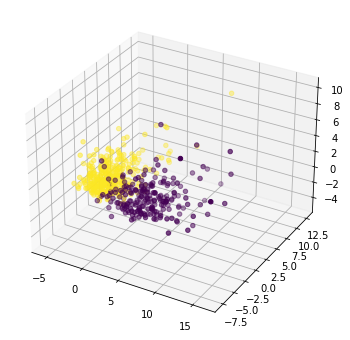

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

b_cancer = load_breast_cancer()
b_cancer_df= pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

pca = decomposition.PCA(n_components=3)
pca.fit(b_cancer_scaled)
b_cancer_pca = pca.transform(b_cancer_scaled)

Y = b_cancer_df['diagnosis']
X = b_cancer_pca

# 시각화
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter( X[:, 0], X[:,1], X[:,2], c=Y)

In [4]:
# 로지스틱 회귀 모형
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# 모델 적합
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
model_lr=LogisticRegression()
model_lr.fit(X_train, Y_train)
Y_predict = model_lr.predict(X_test)

# 평가
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}, roc_auc: {4:.3f}'.format(acccuracy,precision,recall,f1,roc_auc))

정확도: 0.977, 정밀도: 0.971, 재현율: 0.990,  F1: 0.981, roc_auc: 0.973


In [5]:
from sklearn import svm

# SVM 모델 적합
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
model=svm.SVC()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

# 평가
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}, roc_auc: {4:.3f}'.format(acccuracy,precision,recall,f1,roc_auc))

정확도: 0.971, 정밀도: 0.962, 재현율: 0.990,  F1: 0.976, roc_auc: 0.966


로지스틱 회귀에 비해 SVM의 성능이 약간 떨어진다.

# 과제3 : 중요 feature 10개만 사용했을 경우와 성능 비교

In [6]:
import numpy as np
import pandas as pd

feature_name_df = pd.read_csv('UCI_HAR_Dataset/features.txt', sep='\s+',  header=None, names=['index', 'feature_name'], engine='python')
feature_name = feature_name_df.iloc[:, 1].values.tolist()

X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', sep='\s+',header=None,  engine='python')
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', sep='\s+', header=None, engine='python')

Y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', sep='\s+', header=None,  engine='python')
Y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', sep='\s+', header=None,  engine='python')

label_name_df = pd.read_csv('UCI_HAR_Dataset/activity_labels.txt', sep='\s+',  header=None, names=['index', 'label'], engine='python')
label_name = label_name_df.iloc[:, 1].values.tolist()


In [10]:
# 모든 feature 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

dt_HAR = DecisionTreeClassifier(random_state=156)
dt_HAR.fit(X_train, Y_train)
Y_predict = dt_HAR.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predict)
print('예측 정확도 : {0:.4f}'.format(accuracy))

예측 정확도 : 0.8548


In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도 : {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도 : 0.8717


In [11]:
# 상위 10개 feature만 사용
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]

model_dt = DecisionTreeClassifier(random_state=156)
model_dt.fit(X_train.iloc[:,feature_top10.index],Y_train)
Y_predict = model_dt.predict(X_test.iloc[:,feature_top10.index])

accuracy = accuracy_score(Y_test, Y_predict)
print('예측 정확도 : {0:.4f}'.format(accuracy))

예측 정확도 : 0.8334


In [12]:
# 상위 10개 feature만 사용한 모델 GridSearch
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(model_dt, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train.iloc[:,feature_top10.index] , Y_train)
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

best_model_dt = grid_cv.best_estimator_
best_Y_predict = best_model_dt.predict(X_test.iloc[:,feature_top10.index])
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도 : {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도 : 0.8459


10개만 쓴 모델의 정확도가 조금씩 떨어졌다.